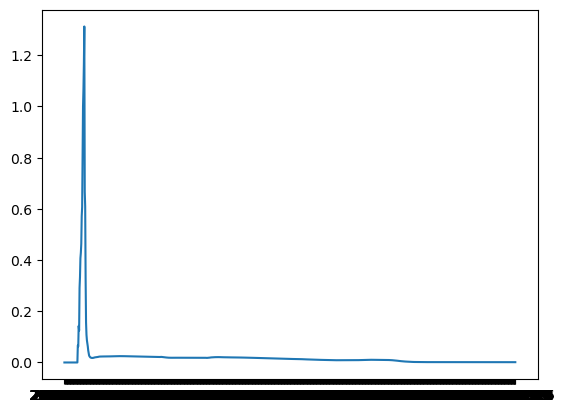

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from decimal import Decimal

#by_60211642
data = pd.read_csv("./코로나바이러스감염증-19_확진환자_발생현황_221126.csv", header = 0)
data.tail(10)

df_covid2 = data.loc[:,['일자','계(명)','사망(명)']][:1042]
df_accumulate = data.loc[:,['일자','계(명)','사망(명)']][1042:1043] 

df_covid.isna().sum()

df_covid = df_covid2.replace("-", 0).set_index('일자')

#누적 확진자 수 구하는 코드
df_covid["누적 확진자 수"] = df_covid["계(명)"]
def cumulative_number(i):
    if i == 0:
        df_covid["누적 확진자 수"][0] = int(df_covid["계(명)"][0])
    else:
        if type(df_covid["계(명)"][i]) != int :
            p = df_covid["계(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["계(명)"][i] = int(str_confirmed)
            
        df_covid["누적 확진자 수"][i] = int(df_covid["누적 확진자 수"][i-1]) + df_covid["계(명)"][i]

for i in range(len(df_covid)):
    cumulative_number(i)
    
#누적 사망자 수 구하는 코드
df_covid["누적 사망자 수"] = df_covid["계(명)"]
def cumulative_number2(i):
    if i == 0:
        df_covid["누적 사망자 수"][0] = int(df_covid["사망(명)"][0])
    else:
        if type(df_covid["사망(명)"][i]) != int :
            p = df_covid["사망(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["사망(명)"][i] = int(str_confirmed)
            
        df_covid["누적 사망자 수"][i] = int(df_covid["누적 사망자 수"][i-1]) + df_covid["사망(명)"][i]

for i in range(len(df_covid)):
    cumulative_number2(i)

#감염률 구하는 코드
df_covid["감염률"] = df_covid["계(명)"]
def infection_rate(i):
    rok_pop = 51628117
    if i == 0:
        df_covid["감염률"][0] = int(df_covid["계(명)"][0])/rok_pop
    else:
        #분모 (전체 국민 - 당일의 누적 확진자 수)
        denominator = (rok_pop - df_covid["누적 확진자 수"][i-1])
        #분자 (당일의 확진자 수)
        numerator = df_covid["계(명)"][i]
        p_infection = numerator/denominator
        df_covid["감염률"][i] = p_infection
            
    
for i in range(len(df_covid)):
    infection_rate(i)

#치명률 구하는 코드
df_covid["치명률"] = df_covid["누적 사망자 수"]
def death_rate(i):
    if i <17:
        df_covid["치명률"][0] = 0
    else:
        #분자 (누적 사망자 수)
        #분모 (17일 전 누적 확진자 수)
        p_lethality = int(df_covid["누적 사망자 수"][i])/int(df_covid["누적 확진자 수"][i-17])
        df_covid["치명률"][i] = p_lethality
            
    
for i in range(len(df_covid)):
    death_rate(i)

df_covid.head(50)
# df_covid.loc['2020.2.17':"2020.3.7"]
#df_covid 

# df_covid1 = df_covid.loc['2020.1.20':'2020.3.2']
# df_covid2 = df_covid.loc['2020.3.8':]
# df_covid = pd.concat([df_covid1, df_covid2],axis=0)


plt.plot(df_covid2['일자'], df_covid['치명률'])
plt.show()

#우세종에 따른 데이터 구간 나누기
df_covid_etc = df_covid.loc['2020.1.20':"2021.7.31"]
# df_covid_etc1 = df_covid.loc['2020.1.20':'2020.3.2']
# df_covid_etc2 = df_covid.loc["2021.3.8":"2021.7.31"]
# df_covid_etc = pd.concat([df_covid_etc1, df_covid_etc2],axis=0)
df_covid_delta = df_covid.loc["2021.8.1":"2022.1.24"]
df_covid_omi = df_covid.loc["2022.1.25":]

#1 감염률 데이터 분석 
print("[1. 감염률 데이터 분석]")
#타입변환
df_covid_etc = df_covid_etc.astype({'감염률' : 'float'})
df_covid_delta = df_covid_delta.astype({'감염률' : 'float'})
df_covid_omi = df_covid_omi.astype({'감염률' : 'float'})

#정규성 검증
print("[정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

#등분산 검증 - 주석처리 해둔 것은 bartlett 말고 다른 등분산 검증 코드들. 값이 다르게 나옴
print("[등분산 검증]")
test_stat, p_val = stats.bartlett(df_covid_etc["감염률"],df_covid_delta["감염률"],df_covid_omi["감염률"])
print("Bartlett Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.fligner(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.levene(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Levene Test-statistics : {}, p-value : {}".format(test_stat, p_val))

#Q-Q plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1) 
plt1 = stats.probplot(df_covid_etc["감염률"],dist=stats.norm, plot=plt)
ax2 = fig.add_subplot(1,3,2) 
plt2 = stats.probplot(df_covid_delta["감염률"],dist=stats.norm, plot=plt)
ax3 = fig.add_subplot(1,3,3) 
plt3 = stats.probplot(df_covid_omi["감염률"],dist=stats.norm, plot=plt)
print()

#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
print("[Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["감염률"], df_covid_delta["감염률"], df_covid_omi["감염률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

#2 치명률 데이터 분석 
print("[2. 치명률 데이터 분석]")
#타입변환
df_covid_etc = df_covid_etc.astype({'치명률' : 'float'})
df_covid_delta = df_covid_delta.astype({'치명률' : 'float'})
df_covid_omi = df_covid_omi.astype({'치명률' : 'float'})

#정규성 검증
print("[정규성 검증]")
test_stat, p_val = stats.shapiro(df_covid_etc["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()

#등분산 검증
print("[등분산 검증]")
test_stat, p_val = stats.bartlett(df_covid_etc["치명률"],df_covid_delta["치명률"],df_covid_omi["치명률"])
print("Bartlett Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.fligner(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Fligner Test-statistics : {}, p-value : {}".format(test_stat, p_val))
# test_stat, p_val = stats.levene(df_covid_etc["계(명)"],df_covid_delta["계(명)"],df_covid_omi["계(명)"])
# print("Levene Test-statistics : {}, p-value : {}".format(test_stat, p_val))

#Q-Q plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1) 
plt1 = stats.probplot(df_covid_etc["치명률"],dist=stats.norm, plot=plt)
ax2 = fig.add_subplot(1,3,2) 
plt2 = stats.probplot(df_covid_delta["치명률"],dist=stats.norm, plot=plt)
ax3 = fig.add_subplot(1,3,3) 
plt3 = stats.probplot(df_covid_omi["치명률"],dist=stats.norm, plot=plt)
print()

#정규성을 만족하지 않으므로 Kruskal-Wallis Test 실행
print("[Kruskal-Wallis Test]")
test_stat, p_val = stats.kruskal(df_covid_etc["치명률"], df_covid_delta["치명률"], df_covid_omi["치명률"])
print("Kruskal-Wallis Test-statistics : {}, p-value : {}".format(test_stat, p_val))
print()